In [16]:
import torch
import numpy as np
import math 

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Sinusoidal PE

Sinusoidal PE do not inherently capture information about the relative positions of tokens in the sequence.

In [3]:
max_len = 100
embed_size = 128

pe = torch.zeros(max_len, embed_size)

position = torch.arange(0, max_len).unsqueeze(1)
div_part = torch.exp(torch.arange(0, embed_size, 2) * (-math.log(10_000.0) / embed_size))

pe[:, 0::2] = torch.sin(position * div_part)
pe[:, 1::2] = torch.cos(position * div_part)

[]

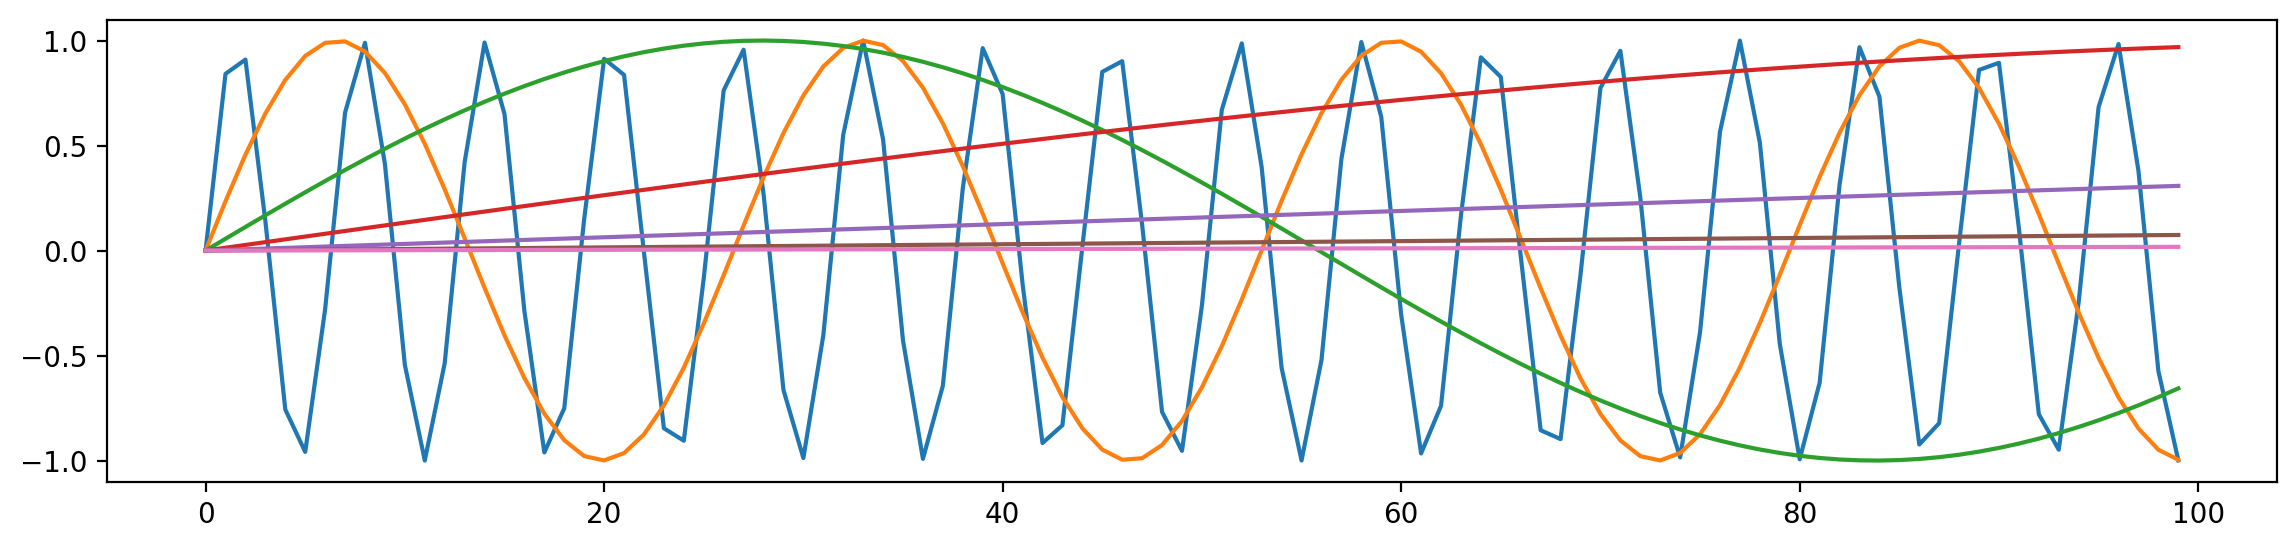

In [4]:
plt.figure(figsize=(14,3))
for embed_dim in [0, 20, 40, 60, 80, 100, 120]:
    plt.plot(torch.arange(max_len), pe[:, embed_dim]);
plt.plot()

In [17]:
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

In [30]:
print(cosine_similarity(pe[:, 0], pe[:,1]))
print(cosine_similarity(pe[:, 0], pe[:, 50]))
print(cosine_similarity(pe[:, 0], pe[:, 125]))

0.006012853
-0.0036996906
0.0053628255
